# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#gather">DATA GATHERING</a></li>
<li><a href="#access">ASSESSING DATA</a></li>
    <ul>
        <li><a href="#quality">Quality Issues</a></li>
        <li><a href="#tidy">Tidiness Issues</a></li>
    </ul>
<li><a href="#clean">CLEANING DATA</a></li>
<li><a href="#store">STORING DATA</a></li>
<li><a href="#eda">DATA ANALYSIS AND VISUALIZATION</a></li>
    <ul>
        <li><a href="#insight">Insights</a></li>
        <li><a href="#visual">Visualization</a></li>
    </ul>

</ul>

<a id='gather'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests    
import re
from io import StringIO
import json

In [2]:
# Reading the WeRateDogs twitter archive 
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Gathering the tweet image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
txt = response.content
# decode to utf-8
txt = txt.decode('utf-8')

In [5]:
tweet_image = pd.read_csv(StringIO(txt), sep='\t')
tweet_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# To save to tsv file
with open('image_predictions.tsv', 'w') as mytsv:
    mytsv.write(tweet_image.to_csv(sep='\t', index=False))

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweet_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [7]:
# Reading the txt file
file = 'tweet-json.txt'
with open(file, encoding='utf-8') as myfile:
    tweet_data_list = myfile.readlines()
# json.loads(tweet_data_list[0])

df_list = []
# loop through each line to get data
for tweet_data in tweet_data_list:
    tweet_id = json.loads(tweet_data)['id']
    retweet_count = json.loads(tweet_data)['retweet_count']
    favorite_count = json.loads(tweet_data)['favorite_count']
    
    df_list.append({'tweet_id':tweet_id,
                    'retweet_count':retweet_count,
                    'favorite_count':favorite_count})

tweet_json = pd.DataFrame(df_list)
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='access'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
tweet_archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
307,835685285446955009,NaN,NaN,2017-02-26 02:57:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rory. He's got an inter...,7.869631e+17,4.196984e+09,2016-10-14 16:13:10 +0000,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
1593,686386521809772549,NaN,NaN,2016-01-11 03:17:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Crimson. He's a Speckled Winnebag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686386521...,11,10,Crimson,None,None,None,None
1378,701570477911896070,NaN,NaN,2016-02-22 00:53:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Yoda. He's a Zimbabwean Rutabaga. Frea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701570477...,9,10,Yoda,None,None,None,None
1377,701601587219795968,NaN,NaN,2016-02-22 02:57:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coopson. He's a Blingin Schnitzel. Bui...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701601587...,10,10,Coopson,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
2160,669567591774625800,NaN,NaN,2015-11-25 17:25:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kollin. He's a Parakeetian Badminton from...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669567591...,9,10,Kollin,None,None,None,None
2131,670086499208155136,NaN,NaN,2015-11-27 03:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hi yes this is dog. I can't help with that s-...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670086499...,10,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
1001,747933425676525569,NaN,NaN,2016-06-28 23:23:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pls don't send more sherks. I don't care how s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747933425...,11,10,None,None,None,None,None


In [9]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

* 181 retweeted tweets not needed
* change columns to appropriate datatype - timestamp to datetime, tweet_id to string
* missing data in 'in_reply_to_status_id', 'in_reply_to_user_id' and 'expanded_urls' columns

In [10]:
tweet_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [11]:
tweet_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [12]:
tweet_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
tweet_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
tweet_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [15]:
tweet_archive.duplicated().sum()

0

In [16]:
tweet_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

* Invalid names of the dogs - some names are *a*, *all*, *the*
* Names in `name` column start with uppercase
* Make name column more descriptive

In [17]:
tweet_image.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
625,680798457301471234,https://pbs.twimg.com/media/CXKuiyHUEAAMAGa.jpg,1,ram,0.499761,False,hog,0.283795,False,ox,0.067455,False
325,671882082306625538,https://pbs.twimg.com/media/CVMBL_LWUAAsvrL.jpg,1,ski_mask,0.968325,False,mask,0.021863,False,abaya,0.005479,False
823,693155686491000832,https://pbs.twimg.com/media/CZ6VatdWwAAwHly.jpg,3,Shih-Tzu,0.697480,True,Lhasa,0.200151,True,Tibetan_terrier,0.090970,True
205,669923323644657664,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,1,car_mirror,0.343063,False,seat_belt,0.110289,False,wing,0.080148,False
570,678396796259975168,https://pbs.twimg.com/media/CWomSU_XIAAUYiK.jpg,2,Pembroke,0.956180,True,Cardigan,0.031803,True,Chihuahua,0.006276,True
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
1937,860276583193509888,https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg,1,lakeside,0.312299,False,dock,0.159842,False,canoe,0.070794,False
420,674042553264685056,https://pbs.twimg.com/media/CVquIDRW4AEJrPk.jpg,1,toy_poodle,0.927975,True,miniature_poodle,0.068946,True,standard_poodle,0.001316,True
109,667885044254572545,https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg,1,malamute,0.088530,True,golden_retriever,0.087499,True,muzzle,0.075008,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


* Change tweet_id to appropriate datatype
* Change column names to more decriptive column name: img_num, p1, p1_conf, p1_dog, p2, p2_conf etc

In [18]:
tweet_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
tweet_image.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [20]:
tweet_image.duplicated().sum()

0

In [21]:
tweet_image['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
slug                    1
timber_wolf             1
book_jacket             1
cougar                  1
bookshop                1
Name: p1, Length: 378, dtype: int64

In [22]:
tweet_image['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [23]:
tweet_image[tweet_image['p1_dog']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


* Some image predictions in p1, p2 and p3 not dogs

In [24]:
tweet_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
tweet_image[tweet_image['p1_dog']==True].describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,1.532000e+03,1532.000000,1532.000000,1532.000000,1.532000e+03
mean,7.429474e+17,1.212794,0.613823,0.141327,6.180374e-02
std,6.863141e+16,0.574115,0.259735,0.102482,5.255780e-02
min,6.660209e+17,1.000000,0.044333,0.000023,2.160900e-07
25%,6.787998e+17,1.000000,0.390981,0.057067,1.540992e-02
50%,7.200513e+17,1.000000,0.614025,0.127964,4.995100e-02
75%,7.987548e+17,1.000000,0.850559,0.203748,9.527215e-02
max,8.921774e+17,4.000000,0.999956,0.467678,2.734190e-01


In [26]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [27]:
tweet_json.sample(10)

,tweet_id,retweet_count,favorite_count
809,771380798096281600,5912,11746
941,752701944171524096,3291,0
1311,706904523814649856,8830,15961
1489,692894228850999298,910,2511
1644,683834909291606017,1265,2880
727,782021823840026624,7236,0
2109,670442337873600512,213,690
462,817423860136083457,17504,38260
1219,714485234495041536,1313,2962
939,752932432744185856,7798,13970


In [28]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [29]:
tweet_json[tweet_json['retweet_count']==0]

,tweet_id,retweet_count,favorite_count
290,838085839343206401,0,150


In [30]:
tweet_json[tweet_json['favorite_count']==0]

,tweet_id,retweet_count,favorite_count
31,886054160059072513,108,0
35,885311592912609280,19297,0
67,879130579576475649,7181,0
72,878404777348136964,1349,0
73,878316110768087041,6965,0
...,...,...,...
1021,746521445350707200,1110,0
1041,743835915802583040,2387,0
1240,711998809858043904,138,0
2257,667550904950915073,37,0


In [31]:
tweet_archive[tweet_archive['tweet_id']==667550882905632768]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None


* 179 tweets have no favorite count (they are not the original tweets)

<a id='quality'></a>
### Quality issues
1. `tweet_archive Table`: remove the 181 retweeted tweets

2. `tweet_archive Table`: remove retweeted related columns because they are empty after handling issue 1 above - 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'. 

3. `tweet_archive Table`: missing data in 'in_reply_to_status_id', 'in_reply_to_user_id' and 'expanded_urls' columns

4. `tweet_archive Table`: Validity issue in the names of the dogs - some names are *a*, *all*, *the*. It appears the inconsistent names start with lower cases. 

5. `tweet_archive Table`: Names in `name` column start with uppercase

6. Inappropriate column datatypes:
    - timestamp to datetime in `tweet_archive` table
    - tweet_id in all 3 tables to string

7. Column names not descriptive: 
    - img_num, p1, p1_conf, p1_dog, p2, p2_conf etc in `tweet_image` table,
    - name in `tweet_archive` table
 
8. None in doggo, floofer, pupper and puppo columns are null values

<a id='tidy'></a>
### Tidiness issues
1. `tweet_archive Table:` doggo, floofer, pupper and puppo can be multiple variables stored in one column

2. tweet_id is common to all three table, hence, all the data can be represented in one table

<a id='clean'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
df_1 = tweet_archive.copy()
df_2 = tweet_image.copy()
df_3 = tweet_json.copy()

### Issue #1: QUALITY ISSUES
**tweet_archive Table: remove 181 retweeted tweets**

#### Define:
- drop 181 retweeted tweets (181 rows)

#### Code

In [33]:
# get the 181 retweeted tweets in the dataframe
retweet = df_1[df_1['retweeted_status_id'].notnull()]
# drop the retweeted tweets from df_1
df_1.drop(retweet.index, inplace=True)

#### Test

In [34]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

**remove retweeted related columns because they are empty after handling issue 1 above - 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.**

#### Define:
- drop retweeted columns. They are empty now

#### Code

In [35]:
# drop the retweet columns
retweet_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_1 = df_1.drop(retweet_cols, axis=1)

#### Test

In [36]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

**tweet_archive Table: missing data in 'in_reply_to_status_id', 'in_reply_to_user_id' and 'expanded_urls' columns**
#### Define:
- drop in_reply columns (over 90% missing data)

#### Code

In [37]:
# drop in_reply columns
drop_cols = ['in_reply_to_status_id', 'in_reply_to_user_id']
df_1.drop(drop_cols, axis=1, inplace=True)

#### Test

In [38]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


**tweet_archive Table: Validity issue in the names of the dogs - some names are *a*, *all*, *the*. It appears the inconsistent names start with lower cases.**
#### Define:
- change invalid names to None

#### Code

In [39]:
# change invalid names to None
names = [name if name[0].isupper() else 'None' for name in df_1['name']]

In [40]:
df_1['name'] = names

#### Test

In [41]:
df_1['name'].value_counts()

None        784
Lucy         11
Charlie      11
Cooper       10
Oliver       10
           ... 
Ed            1
Jessifer      1
Beckham       1
Bell          1
Marlee        1
Name: name, Length: 931, dtype: int64

**tweet_archive Table: Names in `name` column start with uppercase**
#### Define:
- change name case to lower

#### Code

In [42]:
df_1['name'] = df_1['name'].str.lower()

#### Test

In [43]:
df_1['name'].head()

0     phineas
1       tilly
2      archie
3       darla
4    franklin
Name: name, dtype: object

**Inappropriate column datatypes:**
- timestamp in `tweet_archive` table
- tweet_id in all 3 tables
#### Define:
- change timestamp to datetime dtype
- change tweet_id to string i.e. object dtype

#### Code

In [44]:
# change timestamp to datetime dtype
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'])

In [45]:
# change tweet_id to object dtype
df_1['tweet_id'] = df_1['tweet_id'].astype('object')
df_2['tweet_id'] = df_2['tweet_id'].astype('object')
df_3['tweet_id'] = df_3['tweet_id'].astype('object')

#### Test

In [46]:
print('Timestamp dtype is:', df_1['timestamp'].dtype)
print('Tweet archive tweetID dtype is:', df_1['tweet_id'].dtype)
print('Tweet image tweetID dtype is:', df_2['tweet_id'].dtype)
print('Tweet json tweetID dtype is:', df_3['tweet_id'].dtype)

Timestamp dtype is: datetime64[ns, UTC]
Tweet archive tweetID dtype is: object
Tweet image tweetID dtype is: object
Tweet json tweetID dtype is: object


**Column names not descriptive:**
- img_num, p1, p1_conf, p1_dog, p2, p2_conf etc in `tweet_image` table,
- name in `tweet_archive` table
#### Define
- Make the columns names in `tweet_image` table more descriptive
    * e.g. p1 to image_prediction1, p1_conf to prediction1_confidence, etc

#### Code

In [47]:
# change non-descriptive column names in tweet_image table
columns = {'img_num':'image_number',
          'p1':'prediction1',
          'p1_conf': 'prediction1_confidence',
          'p1_dog':'prediction1_is_dogbreed',
          'p2':'prediction2',
          'p2_conf': 'prediction2_confidence',
          'p2_dog':'prediction2_is_dogbreed',
          'p3':'prediction3',
          'p3_conf': 'prediction3_confidence',
          'p3_dog':'prediction3_is_dogbreed'
         }
df_2.rename(columns=columns, inplace=True)

In [48]:
# change name to dog_name
df_1.rename(columns={'name':'dog_name'}, inplace=True)

#### Test

In [49]:
df_1.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,None,None,None,None


In [50]:
df_2.head(1)

,tweet_id,jpg_url,image_number,prediction1,prediction1_confidence,prediction1_is_dogbreed,prediction2,prediction2_confidence,prediction2_is_dogbreed,prediction3,prediction3_confidence,prediction3_is_dogbreed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### 8: 
**None in doggo, floofer, pupper and puppo columns are null values**

#### Define:
- Change None values to null i.e. np.nan

#### Code

In [51]:
df_1['doggo'] = df_1['doggo'].replace('None', np.nan)
df_1['pupper'] = df_1['pupper'].replace('None', np.nan)
df_1['puppo'] = df_1['puppo'].replace('None', np.nan)
df_1['floofer'] = df_1['floofer'].replace('None', np.nan)

#### Test

In [52]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   dog_name            2175 non-null   object             
 8   doggo               87 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              234 non-null    object             
 11  puppo               25 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #1: TIDINESS ISSUE

**tweet_archive Table: doggo, floofer, pupper and puppo can be multiple variables stored in one column**

#### Define:
- Collapse `doggo`, `floofer`, `pupper`, and `puppo` columns into a multivariable column named `dog_type`

#### Code

In [53]:
df_1.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,NaN,NaN,NaN,NaN


In [54]:
# collapsing the doggo, floofer, pupper ad puppo column into one
new_df_1 = pd.melt(df_1,
        id_vars=['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator'],
        value_vars=['doggo', 'floofer', 'pupper', 'puppo'],
        value_name='dogtype')

In [55]:
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8700 non-null   object             
 1   timestamp           8700 non-null   datetime64[ns, UTC]
 2   source              8700 non-null   object             
 3   text                8700 non-null   object             
 4   rating_numerator    8700 non-null   int64              
 5   rating_denominator  8700 non-null   int64              
 6   variable            8700 non-null   object             
 7   dogtype             356 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 543.9+ KB


>After collapsing using melt, the number of observations increased because the observations were stacked on each other 4 times.
>To solve this, I will remove the variable column so that duplicated observations can be dropped

In [56]:
# drop variable column
new_df_1.drop(['variable'], axis=1, inplace=True)

In [57]:
# check for duplicates
new_df_1.duplicated().sum()

6169

In [58]:
#drop duplicates
new_df_1.drop_duplicates(inplace=True)

In [59]:
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 7430
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2531 non-null   object             
 1   timestamp           2531 non-null   datetime64[ns, UTC]
 2   source              2531 non-null   object             
 3   text                2531 non-null   object             
 4   rating_numerator    2531 non-null   int64              
 5   rating_denominator  2531 non-null   int64              
 6   dogtype             356 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 158.2+ KB


> There are still duplicated values from that need to be removed

In [60]:
new_df_1['dogtype'].value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: dogtype, dtype: int64

In [61]:
new_df_1['tweet_id'].duplicated().sum()

356

In [62]:
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 7430
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2531 non-null   object             
 1   timestamp           2531 non-null   datetime64[ns, UTC]
 2   source              2531 non-null   object             
 3   text                2531 non-null   object             
 4   rating_numerator    2531 non-null   int64              
 5   rating_denominator  2531 non-null   int64              
 6   dogtype             356 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 158.2+ KB


In [63]:
#indices of obervations where dogtype notnull
dogtype_ind = new_df_1[new_df_1['dogtype'].notnull()].index.tolist()

In [64]:
# save copy of new_df_1 with dogtype column removed
no_dogtype = new_df_1.drop(['dogtype'], axis=1)
# indices of all duplicated observations
no_dogtype_ind = no_dogtype[no_dogtype.duplicated(subset='tweet_id', keep=False)].index.tolist()
len(no_dogtype_ind)

700

In [65]:
row = []
for i in no_dogtype_ind:
    if i not in dogtype_ind:
        row.append(i)
len(row)

344

> indices of duplicated rows not in `no_dogtype` are duplicated observations with None recorded in the `dogtype` column.
> I will be dropping this rows so I can have unique observations for all observations in the dataset

In [66]:
# drop duplicated tweet_id but keep last which contains dogtype values
new_df_1.drop(row, inplace=True)

In [67]:
new_df_1['dogtype'].value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: dogtype, dtype: int64

In [68]:
new_df_1['tweet_id'].duplicated(keep=False).sum()

24

In [69]:
new_df_1[(new_df_1['tweet_id']==733109485275860992) | (new_df_1['tweet_id']==817777686764523521)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dogtype
382,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,doggo
935,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",12,10,doggo
4732,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,pupper
5285,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",12,10,pupper


> - 12 tweet_ids are still duplicated but they all have
> - The reason for the duplicate is due to the fact that each has two records of dogtype, in the case above for example: each tweet_id have both **doggo** and **pupper** dogtype as extracted from the text

In [70]:
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 7430
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2187 non-null   object             
 1   timestamp           2187 non-null   datetime64[ns, UTC]
 2   source              2187 non-null   object             
 3   text                2187 non-null   object             
 4   rating_numerator    2187 non-null   int64              
 5   rating_denominator  2187 non-null   int64              
 6   dogtype             356 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 136.7+ KB


#### Test

In [71]:
new_df_1.duplicated().sum()

0

* **tweet_id is common to all three table, hence, all the data can be represented in one table**
* **tweet_json: 179 tweets have no favorite count (they are not the original tweets)**
#### Define:
- merge all three tables on tweet_id 
- 179 retweeted tweets will be dropped on merging

#### Code

In [72]:
# merge all tables into one
df = pd.merge(new_df_1, df_3, on='tweet_id')
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dogtype,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,NaN,9774,41048


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2186
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2187 non-null   object             
 1   timestamp           2187 non-null   datetime64[ns, UTC]
 2   source              2187 non-null   object             
 3   text                2187 non-null   object             
 4   rating_numerator    2187 non-null   int64              
 5   rating_denominator  2187 non-null   int64              
 6   dogtype             356 non-null    object             
 7   retweet_count       2187 non-null   int64              
 8   favorite_count      2187 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(4)
memory usage: 170.9+ KB


In [74]:
master_df = pd.merge(df, df_2, on='tweet_id')

#### Test

In [75]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2004
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 2005 non-null   object             
 1   timestamp                2005 non-null   datetime64[ns, UTC]
 2   source                   2005 non-null   object             
 3   text                     2005 non-null   object             
 4   rating_numerator         2005 non-null   int64              
 5   rating_denominator       2005 non-null   int64              
 6   dogtype                  317 non-null    object             
 7   retweet_count            2005 non-null   int64              
 8   favorite_count           2005 non-null   int64              
 9   jpg_url                  2005 non-null   object             
 10  image_number             2005 non-null   int64              
 11  prediction1              2005 

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [76]:
master_df.to_csv('twitter_archive_master.csv', index=False)

<a id='eda'></a>
## Analyzing and Visualizing Data

<ul>
    <li><a href="#insight">Insights</a></li>
    <li><a href="#visual">Visualization</a></li>
</ul>

In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [77]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dogtype,retweet_count,favorite_count,jpg_url,image_number,prediction1,prediction1_confidence,prediction1_is_dogbreed,prediction2,prediction2_confidence,prediction2_is_dogbreed,prediction3,prediction3_confidence,prediction3_is_dogbreed
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [78]:
df['prediction1'].value_counts()

golden_retriever      143
Labrador_retriever     96
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
Japanese_spaniel        1
snowmobile              1
platypus                1
beaver                  1
zebra                   1
Name: prediction1, Length: 374, dtype: int64

In [79]:
df[df['prediction1']=='golden_retriever']['prediction1_is_dogbreed'].value_counts()

True    143
Name: prediction1_is_dogbreed, dtype: int64

In [80]:
df[df['prediction1']=='Labrador_retriever']['prediction1_is_dogbreed'].value_counts()

True    96
Name: prediction1_is_dogbreed, dtype: int64

- The Golden Retriever dog breed is the most posted dog, second to it is the Labrador_retriever 

In [81]:
df[df['favorite_count']==df['favorite_count'].max()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dogtype,retweet_count,favorite_count,jpg_url,image_number,prediction1,prediction1_confidence,prediction1_is_dogbreed,prediction2,prediction2_confidence,prediction2_is_dogbreed,prediction3,prediction3_confidence,prediction3_is_dogbreed
1991,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13,10,puppo,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


In [82]:
fav_dog = df.groupby(['prediction1'])[['favorite_count', 'retweet_count']].sum().sort_values(by=['favorite_count'], ascending=False)
fav_dog.head()

,favorite_count,retweet_count
prediction1,,
golden_retriever,1767909,527935
Labrador_retriever,1130889,368255
Pembroke,994755,280367
Chihuahua,676441,220695
Samoyed,542991,184922


In [83]:
fav_dog.loc[['Samoyed','pug']]

,favorite_count,retweet_count
prediction1,,
Samoyed,542991,184922
pug,320223,99182


In [84]:
df['prediction1'].value_counts().loc[['Samoyed', 'pug']]

Samoyed    40
pug        54
Name: prediction1, dtype: int64

> - The Golden Retriever dog breed is the people's favorite dog. It has the highest favourite and retweet count
> - Even though the pug has more original post (54) than the Samoyed (40), The Samoyed has more retweet and favorite count. Almost double of the pug counts. Samoyed is preferred to pug

<a id='insight'></a>
### Insights:
1. The Golden Retriever dog breed is the most posted dog, second to it is the Labrador_retriever 

2. The Golden Retriever dog breed is the people's favorite dog. It has the highest favourite and retweet count

3. Even though the pug has more original post (54) than the Samoyed (40), The Samoyed has more retweet and favorite count. Almost double of the pug counts. Samoyed is preferred to pug

4. There is a positive correlation between the retweet count and favorite count as seen below

<a id='visual'></a>
### Visualization

In [86]:
df['prediction1'].value_counts().values[:10]

array([143,  96,  88,  79,  54,  41,  40,  38,  38,  29], dtype=int64)

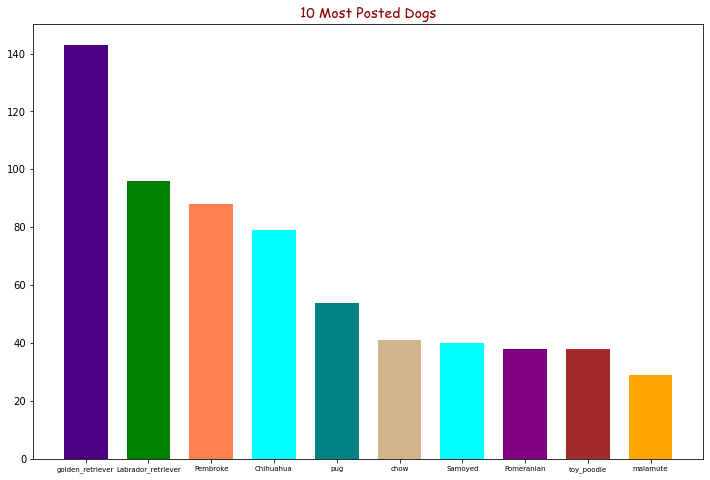

In [87]:
font = {'family': 'fantasy',
        'color':  'darkred',
        'size': 14,
        }
color=['indigo', 'green', 'coral', 'aqua', 'teal', 'tan', 'cyan', 'purple', 'brown', 'orange']

plt.figure(figsize=(12, 8))
plt.bar(df['prediction1'].value_counts().index[:10], df['prediction1'].value_counts().values[:10], width=0.7, color=color);
plt.title('10 Most Posted Dogs', fontdict=font);
plt.xticks(fontsize=7);


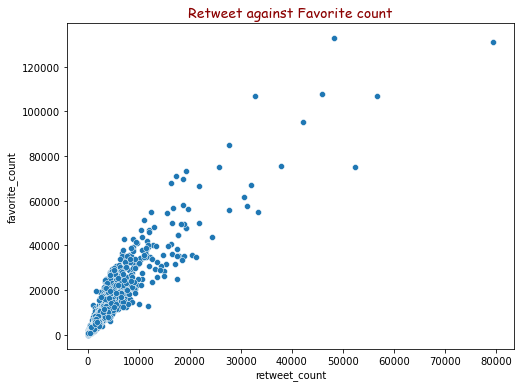

In [88]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['retweet_count'], y=df['favorite_count'])
plt.title('Retweet against Favorite count', fontdict=font);

In [89]:
fav_dog.reset_index(inplace=True)

In [90]:
top_10 = fav_dog.iloc[:10, :]
top_10

,prediction1,favorite_count,retweet_count
0,golden_retriever,1767909,527935
1,Labrador_retriever,1130889,368255
2,Pembroke,994755,280367
3,Chihuahua,676441,220695
4,Samoyed,542991,184922
5,French_bulldog,465738,121782
6,chow,404241,116361
7,pug,320223,99182
8,cocker_spaniel,315825,100561
9,Pomeranian,299114,106518


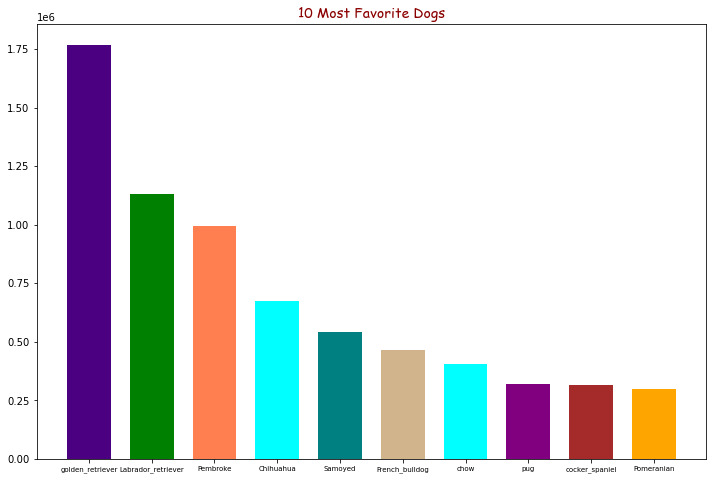

In [91]:
color=['indigo', 'green', 'coral', 'aqua', 'teal', 'tan', 'cyan', 'purple', 'brown', 'orange']

plt.figure(figsize=(12, 8))
plt.bar(top_10['prediction1'], top_10['favorite_count'], width=0.7, color=color)
plt.title('10 Most Favorite Dogs', fontdict=font);
plt.xticks(fontsize=7);